Importing the Dependencies


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

Data Collection & Processing

In [13]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')

In [14]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [15]:
exercise_data=pd.read_csv('exercise.csv')

In [16]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [17]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [18]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [19]:
# Checking the number of rows and columns
calories_data.shape

(15000, 9)

In [20]:
# Getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [21]:
# Checking the missing value
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [22]:
# Get some statistical measure about data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [23]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

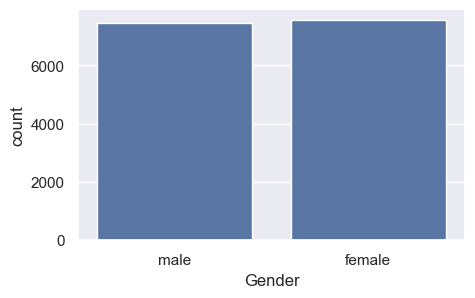

In [39]:
# Ploting the gender column in count plot
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', data=calories_data)

C:\Users\ujwal\AppData\Local\Temp\ipykernel_3452\3865065068.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(calories_data['Age'], shade=True, color='green')


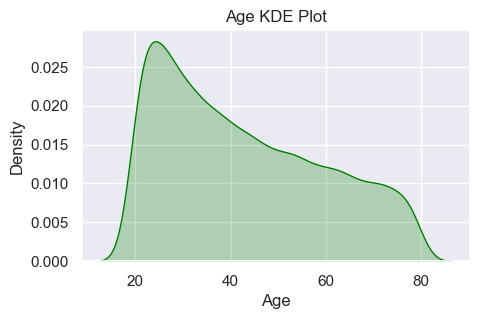

In [38]:
# finding the distribution of "Age" column
plt.figure(figsize=(5, 3))
sns.kdeplot(calories_data['Age'], shade=True, color='green')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age KDE Plot')
plt.show()


C:\Users\ujwal\AppData\Local\Temp\ipykernel_3452\1895177603.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(calories_data['Height'], shade=True, color='green')


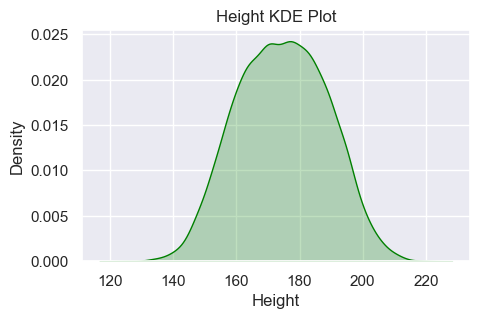

In [40]:
# finding the distribution of "Height" column
plt.figure(figsize=(5, 3))
sns.kdeplot(calories_data['Height'], shade=True, color='green')
plt.xlabel('Height')
plt.ylabel('Density')
plt.title('Height KDE Plot')
plt.show()


C:\Users\ujwal\AppData\Local\Temp\ipykernel_3452\2479751865.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(calories_data['Weight'], shade=True, color='green')


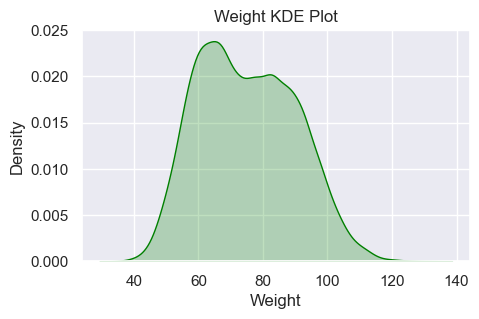

In [41]:
# finding the distribution of "Weight" column
plt.figure(figsize=(5, 3))
sns.kdeplot(calories_data['Weight'], shade=True, color='green')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Weight KDE Plot')
plt.show()


C:\Users\ujwal\AppData\Local\Temp\ipykernel_3452\3791921064.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(calories_data['Duration'], shade=True, color='green')


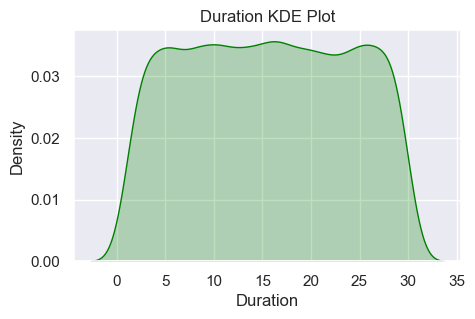

In [42]:
# finding the distribution of "Duration" column
plt.figure(figsize=(5, 3))
sns.kdeplot(calories_data['Duration'], shade=True, color='green')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.title('Duration KDE Plot')
plt.show()


C:\Users\ujwal\AppData\Local\Temp\ipykernel_3452\3608337188.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(calories_data['Heart_Rate'], shade=True, color='green')


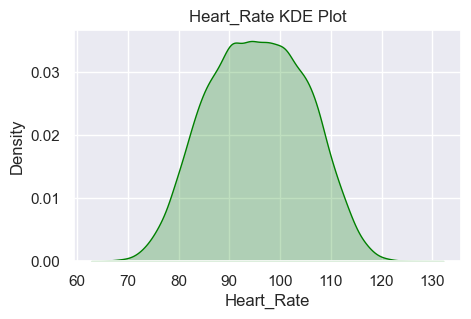

In [43]:
# finding the distribution of "Heart_Rate" column
plt.figure(figsize=(5, 3))
sns.kdeplot(calories_data['Heart_Rate'], shade=True, color='green')
plt.xlabel('Heart_Rate')
plt.ylabel('Density')
plt.title('Heart_Rate KDE Plot')
plt.show()


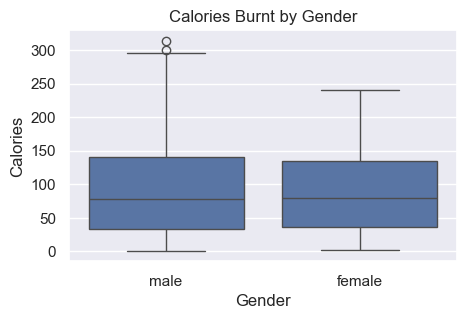

In [53]:
# Calories burnt by gender
plt.figure(figsize=(5, 3))
sns.boxplot(x='Gender', y='Calories', data=calories_data)
plt.title("Calories Burnt by Gender")
plt.show()


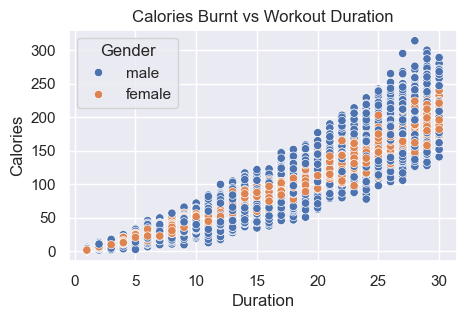

In [54]:
# Duration vs Calories (Workout Effectiveness)
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Duration', y='Calories', hue='Gender', data=calories_data)
plt.title("Calories Burnt vs Workout Duration")
plt.show()


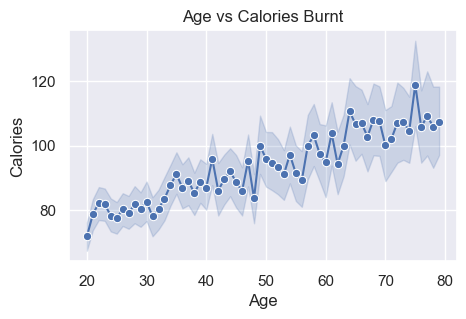

In [55]:
# Age vs Calories burnt
plt.figure(figsize=(5, 3))
sns.lineplot(x='Age', y='Calories', marker='o', data=calories_data)
plt.title("Age vs Calories Burnt")
plt.show()


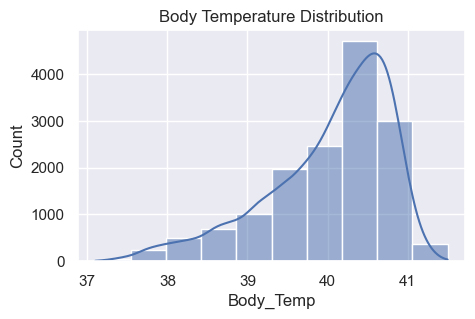

In [56]:
# Distribution of Body Temperature
plt.figure(figsize=(5, 3))
sns.histplot(calories_data['Body_Temp'], kde=True, bins=10)
plt.title("Body Temperature Distribution")
plt.show()


<Figure size 500x300 with 0 Axes>

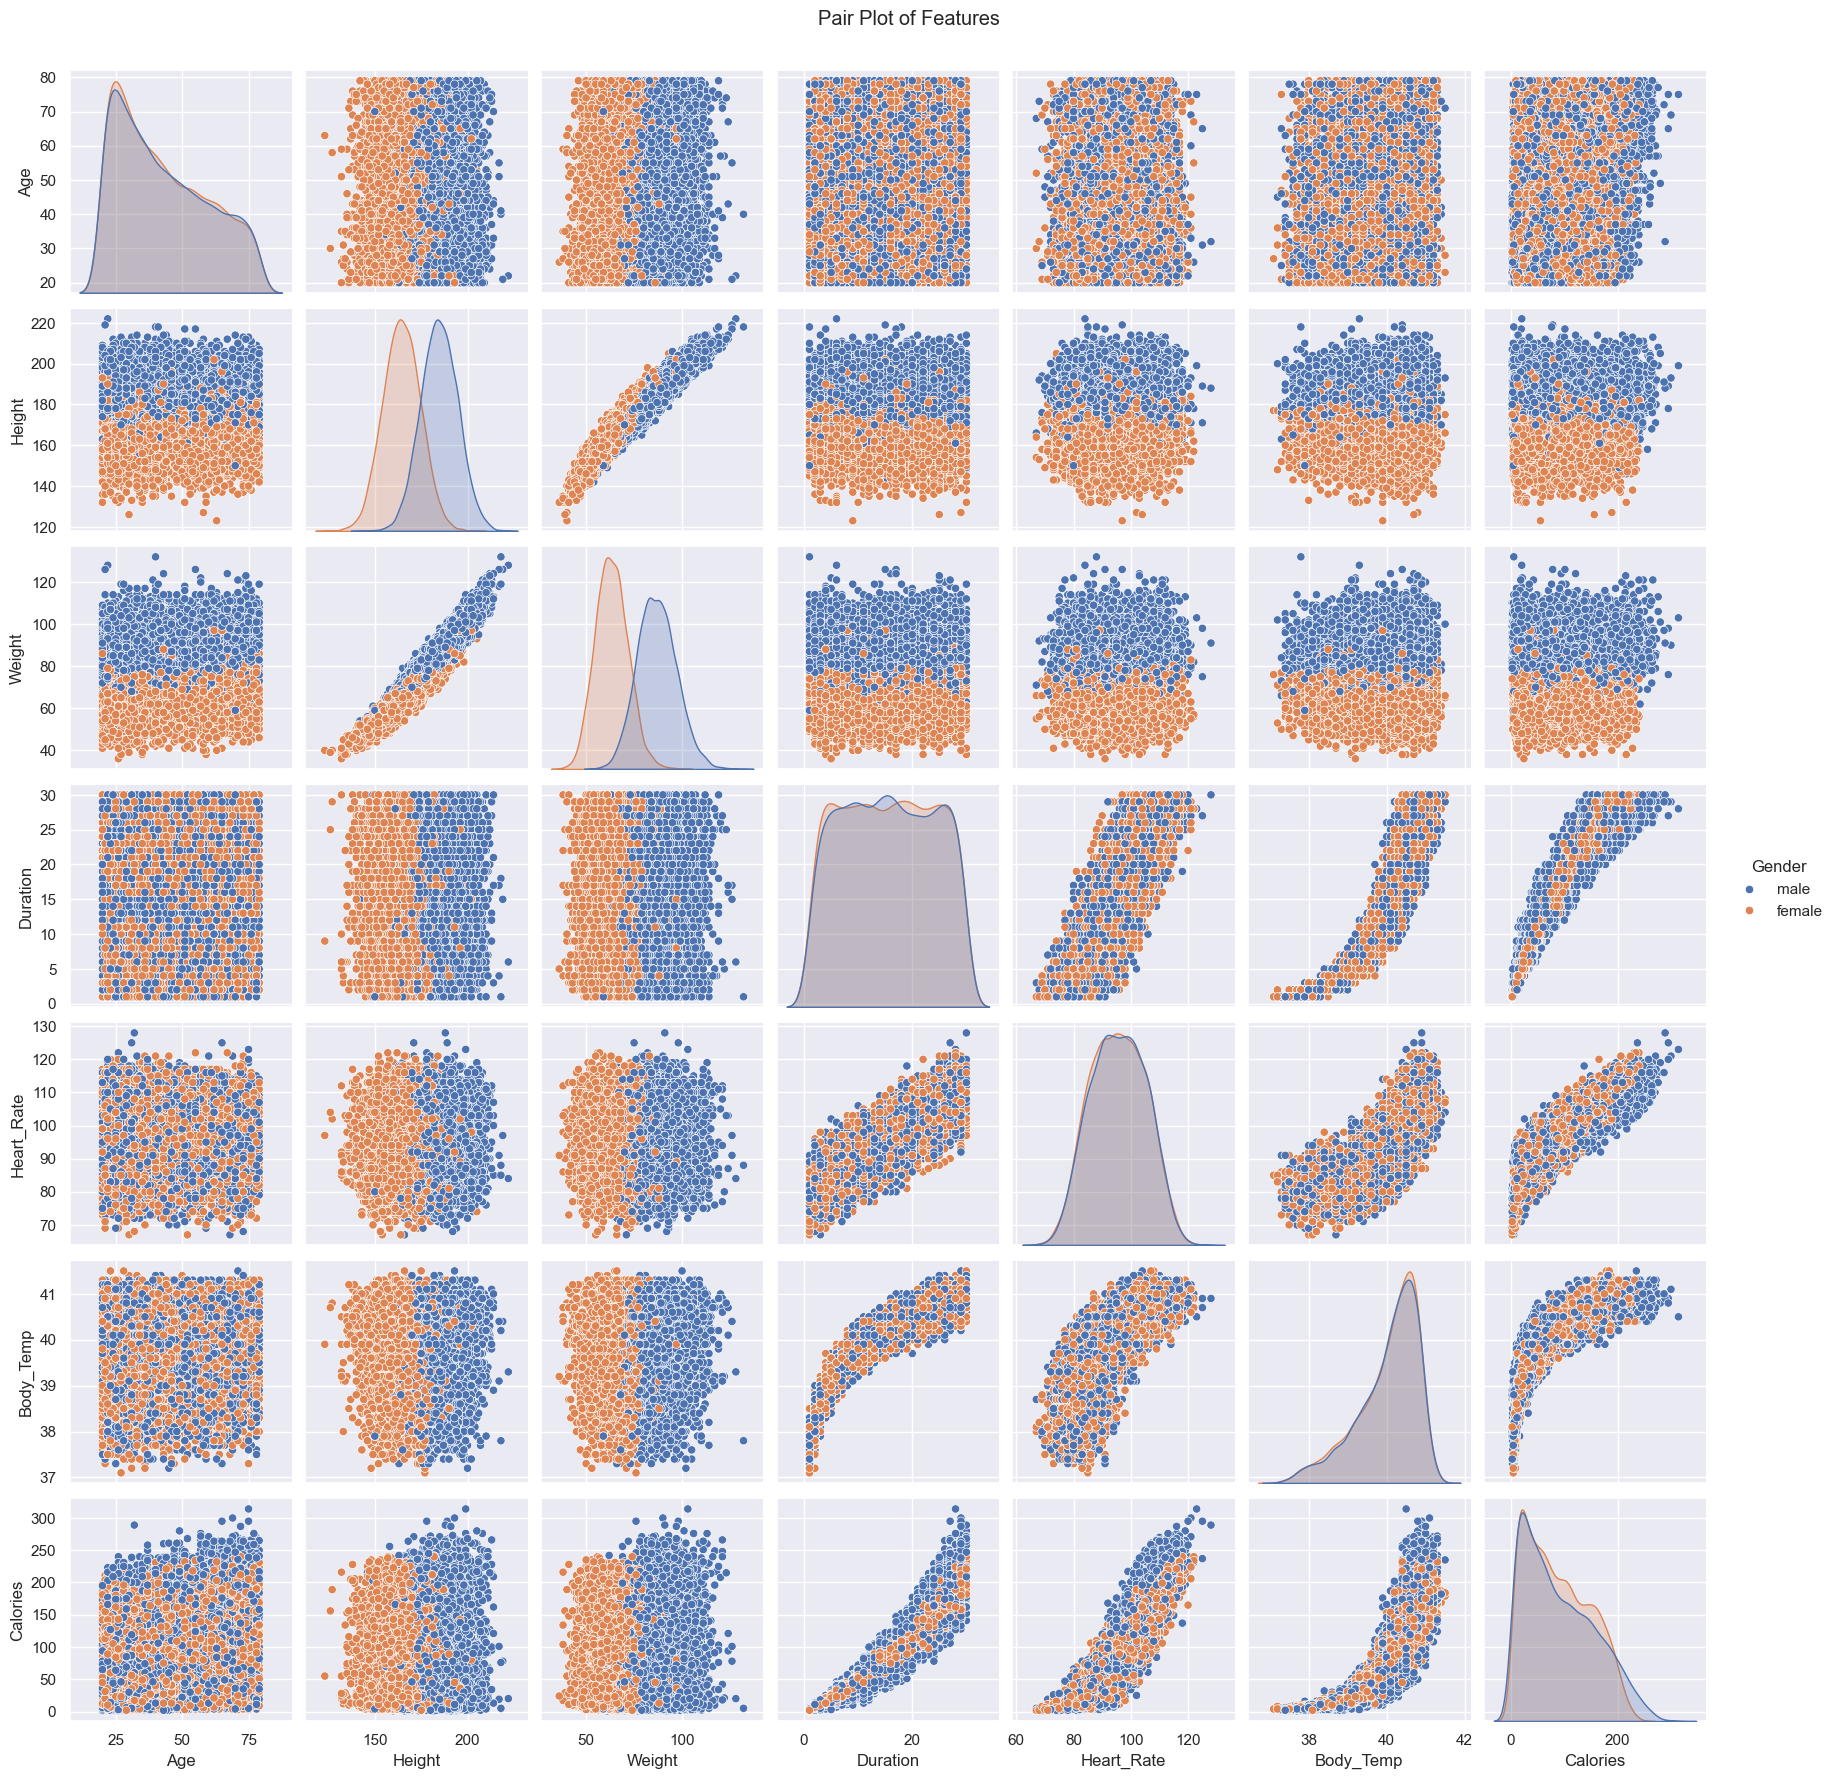

In [58]:
# Pair Plot for Overall Relationship
plt.figure(figsize=(5, 3))
sns.pairplot(calories_data.drop(columns=['User_ID']), hue='Gender')
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()


Finding the Correlation in the dataset

1.Positive Correlation
2.Negative Correlation

In [60]:
correlation = calories_data.corr(numeric_only=True)
print(correlation)

             User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   

            Body_Temp  Calories  
User_ID      0.000923 -0.001661  
Age          0.013175  0.154395  
Height       0.001200  0.017537  
Weight       0.004095  0.035481  
Duration     0.903167  0.955421  
Heart_Rate   0.771529  0.897882  
Body_Temp    1.000000  0.824558  
Calories     0.824558  1.000000  


<Axes: >

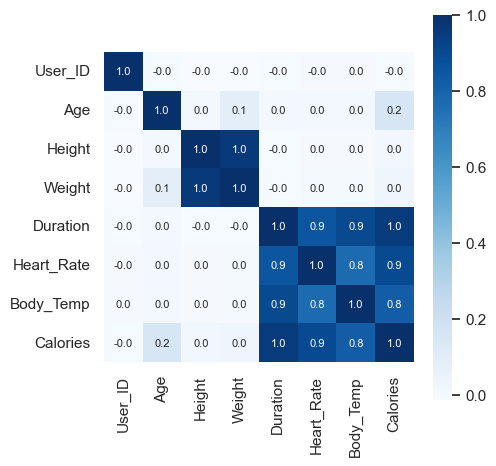

In [65]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


Converting the text data to numerical values

In [63]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

C:\Users\ujwal\AppData\Local\Temp\ipykernel_3452\2713499166.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [67]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [71]:
X=calories_data.drop(columns=['User_ID','Calories'])
Y=calories_data['Calories']

In [72]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [73]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [75]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Traning

XGBoost Regressor

In [93]:
model = XGBRegressor(random_state=42)
model.fit(X_train, Y_train)
test_data_prediction = model.predict(X_test)
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
r2 = metrics.r2_score(Y_test, test_data_prediction)
mse = metrics.mean_squared_error(Y_test, test_data_prediction)
rmse = np.sqrt(mse)
print("Mean Absolute Error = ", mae)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error =  1.4833678883314132
R2 Score: 0.998800624504713
Root Mean Squared Error: 2.1704170134933394


LinearRegression

In [95]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
lr_pred = lr_model.predict(X_test)
mae = metrics.mean_absolute_error(Y_test, lr_pred)
r2 = metrics.r2_score(Y_test, lr_pred)
mse = metrics.mean_squared_error(Y_test, lr_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error = ", mae)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error =  8.385188053147212
R2 Score: 0.9668790377181355
Root Mean Squared Error: 11.405572053250278


Random Forest

In [96]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
mae = metrics.mean_absolute_error(Y_test, rf_pred)
r2 = metrics.r2_score(Y_test, lr_pred)
mse = metrics.mean_squared_error(Y_test, rf_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error = ", mae)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error =  1.7159300000000004
R2 Score: 0.9668790377181355
Root Mean Squared Error: 2.7142122921147247


Support Vector Regressor

In [97]:
svr_model = SVR()
svr_model.fit(X_train, Y_train)
svr_pred = svr_model.predict(X_test)
mae = metrics.mean_absolute_error(Y_test, svr_pred)
r2 = metrics.r2_score(Y_test, lr_pred)
mse = metrics.mean_squared_error(Y_test, svr_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error = ", mae)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error =  10.620614362927721
R2 Score: 0.9668790377181355
Root Mean Squared Error: 15.597855696171367


Decision Tree Regressor 

In [99]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_test)
mae = metrics.mean_absolute_error(Y_test, svr_pred)
r2 = metrics.r2_score(Y_test, lr_pred)
mse = metrics.mean_squared_error(Y_test, svr_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error = ", mae)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error =  10.620614362927721
R2 Score: 0.9668790377181355
Root Mean Squared Error: 15.597855696171367


Conclusion

XGBoost is the best model because
1. Lowest MAE (1.48) → Most accurate predictions on average
2. Lowest RMSE (2.17) → Fewer large prediction errors.
3. Highest R² (0.9988) → Explains almost all variance in the target.
   
Random Forest is decent but slightly worse than XGBoost.
Linear Regression, SVR, and Decision Tree show much higher errors and lower R², making them less reliable for this problem.

Priority order: XGBoost > Random Forest > Linear Regression > SVR ≈ Decision Tree
